## Final exercises

<strong>Overview</strong>
Exercise 1: From provided human PPI network identify the gene module with the most number of genes that are known to interact with the SARS-Cov-2 virus. The genes in this module might be important for the infection (guilt-by-association) and might act as a potential drug targets.
Exercise 2: Prioritize the genes in the module identified in exercise 1 based on network centralities as top potential drug targets.
Exercise 3: Use network proximities between the potential drug targets identified in exercise 2 and the targets of known drugs to identify potential drugs for SARS-Cov-2.

<strong>Files to use:</strong>
- Network: Data/Exercise_PPI_Net.csv
- SARS-Cov-2 targets: Data/SARSCoV2_Targets.csv
- Drug targets : Data/drug2targets.csv

#### Exercise 1: Identify network modules in PPI network consisting of known SARS-Cov-2 targets
- Indentify modules in the provided network using Girvan-Newman method
- For each module detected check how many known SARS-Cov-2 targets it contain

In [ ]:
# Upload python modules
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms.community.centrality import girvan_newman
# Import python modules for visualizations
import matplotlib.pylab as plt

%matplotlib inline

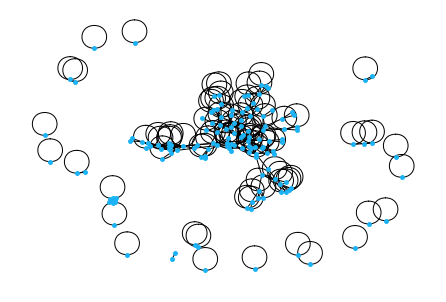

In [ ]:
# Reading the PPI network
edge_list = pd.read_csv("Data/Exercise_PPI_Net.csv")

# Creating network from edge list 
ppi = nx.from_pandas_edgelist(df = edge_list,
                                source = "proteinA", 
                                target = "proteinB")

ppi_pos = nx.spring_layout(ppi, seed = 123)
nx.draw(ppi, with_labels = False, pos = ppi_pos, node_size = 15, node_color = "#1BB3F5")

In [ ]:
# Extract the largest connected component
ppi = list(ppi.subgraph(c).copy() for c in sorted(nx.connected_components(ppi), key = len, reverse = True))[0]
print(len(ppi.nodes()), len(ppi.edges()))

109 236


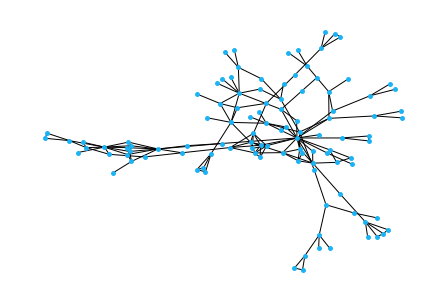

In [ ]:
# Remove self-loops
ppi.remove_edges_from(nx.selfloop_edges(ppi))
nx.draw(ppi, with_labels = False, pos = ppi_pos, node_size = 15, node_color = "#1BB3F5")

In [ ]:
# Use Girvan-Newman algorithm to detect communities in the network
community = girvan_newman(ppi)
community = tuple(sorted(c) for c in next(community))
community

([70,
  286,
  523,
  546,
  629,
  718,
  1277,
  1649,
  2035,
  2038,
  2078,
  2115,
  2130,
  2175,
  2176,
  2177,
  2178,
  2187,
  2189,
  2308,
  2313,
  2521,
  2623,
  3039,
  3040,
  3043,
  3075,
  3098,
  3426,
  3458,
  4015,
  4179,
  4598,
  4607,
  4624,
  4625,
  4633,
  4634,
  4646,
  4683,
  4891,
  5077,
  5081,
  5155,
  5422,
  5557,
  5558,
  5925,
  6521,
  6708,
  6710,
  6921,
  6923,
  7090,
  7134,
  7137,
  7139,
  7168,
  7273,
  7414,
  7490,
  8013,
  8048,
  8453,
  8557,
  8614,
  8648,
  10516,
  10661,
  11200,
  23512,
  23649,
  26515,
  26519,
  26520,
  26574,
  50943,
  51116,
  51778,
  54738,
  55120,
  55215,
  64432,
  64969,
  79058,
  79954,
  81494,
  91624,
  164656],
 [51,
  215,
  847,
  2131,
  5189,
  5190,
  5191,
  5192,
  5193,
  5194,
  5195,
  5264,
  5824,
  5828,
  5830,
  8443,
  8504,
  8540,
  9409,
  55670])

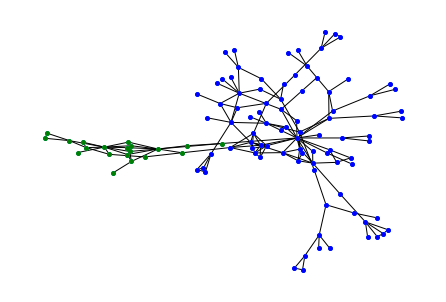

In [ ]:
nx.draw(ppi, with_labels = False, pos = ppi_pos, node_size = 15, node_color = "#1BB3F5")
nx.draw_networkx_nodes(ppi, pos = ppi_pos, nodelist = community[0], node_size = 15, node_color = "blue")
nx.draw_networkx_nodes(ppi, pos = ppi_pos, nodelist = community[1], node_size = 15, node_color = "green")


In [ ]:
# Read the targets for SARS-Cov-2
SarsCov_targets = pd.read_csv('./Data/SARSCoV2_Targets.csv')
SarsCov_targets.head()

,SARS,EntrezID,Symbol
0,sars-cov2e,8546,AP3B1
1,sars-cov2e,23476,BRD4
2,sars-cov2e,6046,BRD2
3,sars-cov2e,10283,CWC27
4,sars-cov2e,124245,ZC3H18


In [ ]:
# Check overlap of the SARS-CoV-2 targets with the gene modules
result = pd.DataFrame()
for module_number, module in enumerate(community):
    overlap = list(set(community[module_number]) & set(SarsCov_targets["EntrezID"].unique()))
    tmp = pd.DataFrame({"Module" : module_number,
                            "Number of module genes" : len(module),
                            "Number of overlapping SARS-CoV-2 targets" : len(overlap)}, 
                            index = [module_number])
    result = pd.concat([result, tmp])
print(result)

   Module  Number of module genes  Number of overlapping SARS-CoV-2 targets
0       0                      89                                        20
1       1                      20                                         1


Here, we see that the module 0 has the highest overlap with the known SARS-CoV-2 targets. Based on guilt-by-association, we can assume that the genes in module 0 must be important for the disease. 

#### Exercise 2: Prioritization of genes based on network centralities
- Extract the module from the PPI identified to be important to SARS-CoV-2 in exercise 1
- Calculate the centralities for each target
- Identify the genes that are ranked highly by the degree centrality, closeness centrality and betweenness centrality.
- Are there any genes that are common?

In [ ]:
# Extract sub-network of the identified module
module0_genes = community[0]
module0_net = ppi.subgraph(module0_genes)
print(len(module0_net.nodes()), len(module0_net.edges()))

89 132


In [ ]:
# Calculate the centralities for genes 
degree_centrality = nx.degree_centrality(module0_net)
betweenness_centrality = nx.betweenness_centrality(module0_net)
closeness_centrality = nx.closeness_centrality(module0_net)
centrality_table = pd.DataFrame({"Degree centrality" : pd.Series(degree_centrality),
                                    "Betweenness" : pd.Series(betweenness_centrality),
                                    "Closeness centrality" : pd.Series(closeness_centrality)})
centrality_table

,Degree centrality,Betweenness,Closeness centrality
2623,0.193182,0.478915,0.329588
2175,0.068182,0.005613,0.252149
2038,0.022727,0.000000,0.255072
8648,0.034091,0.014567,0.277603
5925,0.079545,0.213486,0.277603
...,...,...,...
26520,0.022727,0.000000,0.201835
91624,0.011364,0.000000,0.145455
54738,0.011364,0.000000,0.213075
79954,0.011364,0.000000,0.194690


In [ ]:
# Print top 10 genes by centrality
top_degree = list(centrality_table.sort_values(by = "Degree centrality", ascending = False)[0:10].index)
top_betweenness = list(centrality_table.sort_values(by = "Betweenness", ascending = False)[0:10].index)
top_closeness = list(centrality_table.sort_values(by = "Closeness centrality", ascending = False)[0:10].index)

print(top_degree)
print(top_betweenness)
print(top_closeness)

[2623, 23512, 2189, 5925, 2176, 55120, 6521, 2175, 50943, 2177]
[2623, 7273, 5925, 4607, 7090, 23512, 70, 6521, 50943, 2313]
[2623, 7090, 6708, 7273, 286, 50943, 6521, 2313, 2189, 55120]


In [ ]:
# Identify the genes that are common
# These genes might be more important
select_genes = list(set(top_degree) & set(top_betweenness) & set(top_closeness))
select_genes

[6521, 50943, 2623]

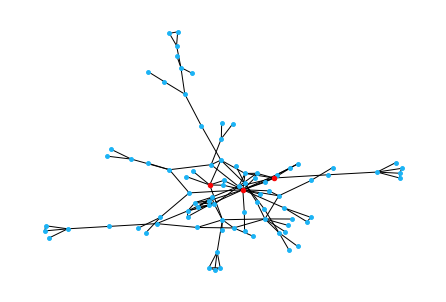

In [ ]:
module0_net_pos = nx.spring_layout(module0_net, seed = 123)
nx.draw(module0_net, with_labels = False, pos = module0_net_pos, node_size = 15, node_color = "#1BB3F5")
nx.draw_networkx_nodes(module0_net, pos = module0_net_pos, nodelist = select_genes, node_size = 20, node_color = "red")


#### Exercise 3: Drug repurposing using network based proximities
- Calculate network proximities between known drug targets and genes identified in exercise 2 as potential targets
- Identify which drugs could be used for the treatment of SARS-CoV-2




In [ ]:
drug_targets = pd.read_csv("Data/drug2targets.csv")
drug_targets.head()

,Unnamed: 0,type,ID,Name,State,Approved,Indication,Gene_Target,DB_id,name,organism,Type,entrez_id,ATC_code
0,0,biotech,DB00001,Lepirudin,liquid,approved,For the treatment of heparin-induced thrombocy...,F2,BE0000048,Prothrombin,Humans,Polypeptide,2147.0,B01AE02
1,1,biotech,DB00002,Cetuximab,liquid,approved,"Cetuximab, used in combination with irinotecan...",EGFR,BE0002100,Low affinity immunoglobulin gamma Fc region re...,Humans,Polypeptide,1956.0,L01XC06
2,2,biotech,DB00002,Cetuximab,liquid,approved,"Cetuximab, used in combination with irinotecan...",FCGR3B,BE0002100,Low affinity immunoglobulin gamma Fc region re...,Humans,Polypeptide,2215.0,L01XC06
3,3,biotech,DB00002,Cetuximab,liquid,approved,"Cetuximab, used in combination with irinotecan...",C1R,BE0002100,Low affinity immunoglobulin gamma Fc region re...,Humans,Polypeptide,715.0,L01XC06
4,4,biotech,DB00002,Cetuximab,liquid,approved,"Cetuximab, used in combination with irinotecan...",C1QA,BE0002100,Low affinity immunoglobulin gamma Fc region re...,Humans,Polypeptide,712.0,L01XC06


In [ ]:
drug_targets = drug_targets.loc[drug_targets['Approved'].isin(['approved', 'experimental', 'investigational', 'vet_approved'])]
# drug_targets = drug_targets.loc[drug_targets['type'].isin(['small molecule'])]
drug_targets = drug_targets[drug_targets['entrez_id'].notna()]

print(len(drug_targets['Name'].unique()))

6057


In [ ]:
# Since our search space is the module 0, we reduce the drugs to only those that has targets in module 0
drug_targets = drug_targets.loc[drug_targets['entrez_id'].isin(module0_net.nodes())]
print(len(drug_targets['Name'].unique()))

106


In [ ]:
# Prepare known drug-target associations 
drug2targets = {}
for drug in drug_targets["Name"].unique(): 
    drug2targets[drug] = [int(e) for e in drug_targets.loc[drug_targets['Name'] == drug, 'entrez_id']]

In [ ]:
# Remove drugs with one known targets
drug2targets = {key: value for key, value in drug2targets.items() if len(value) > 1}

In [ ]:
# Calculate network separation between the targets of known drugs and selected genes in exercise 2 
import separation # from Barabasi-lab
result = pd.DataFrame()
for drug in drug2targets.keys():

    genes_A = set(select_genes) & set(module0_net.nodes())
    genes_B = set(drug2targets[drug]) & set(module0_net.nodes())

    d_A = separation.calc_single_set_distance(module0_net,genes_A)
    d_B = separation.calc_single_set_distance(module0_net,genes_B)

    # distances BETWEEN the two gene sets:
    d_AB = separation.calc_set_pair_distances(module0_net,genes_A,genes_B)

    # calculate separation
    s_AB = d_AB - (d_A + d_B)/2

    tmp = pd.DataFrame({"Drug" : drug,
                            "Number of targets" : len(genes_B),
                            "Separation" : s_AB},
                            index = [0])

    result = pd.concat([result, tmp])
result = result.sort_values(by = "Separation", ascending = False)
result = result.reset_index(drop = True)
result

,Drug,Number of targets,Separation
0,N-(6-Aminohexyl)-5-Chloro-1-Naphthalenesulfona...,2,5.233333
1,Zinc chloride,6,1.055556
2,Zinc acetate,6,1.055556
3,Zinc,6,1.055556
4,Copper,7,0.647619
5,"1,3,5-BENZENETRICARBOXYLIC ACID",2,0.633333
6,Ferric pyrophosphate citrate,2,0.633333
7,Sodium ferric gluconate complex,2,0.633333
8,Ferric pyrophosphate,2,0.633333
9,Oxygen,2,0.633333


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=567e54c1-8e1f-4560-8621-8b304ec1f642' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>